In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Cutlets.csv')

In [11]:
faltoons=pd.read_csv('Faltoons.csv')

In [88]:
Buyer=pd.read_csv('BuyerRatio.csv')

In [13]:
Customer=pd.read_csv('Costomer+OrderForm.csv')

In [14]:
lab=pd.read_csv('LabTAT.csv')

In [16]:
df.shape,faltoons.shape,Buyer.shape,Customer.shape,lab.shape

((35, 2), (400, 2), (2, 5), (300, 4), (120, 4))

In [4]:
df.columns

Index(['Unit A', 'Unit B'], dtype='object')

In [5]:
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


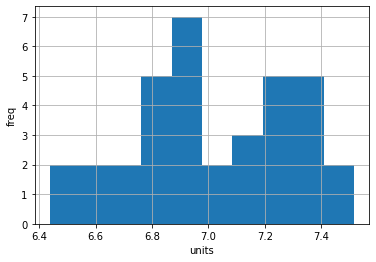

In [6]:
df['Unit A'].hist()
plt.xlabel("units")
plt.ylabel("freq")
plt.show()

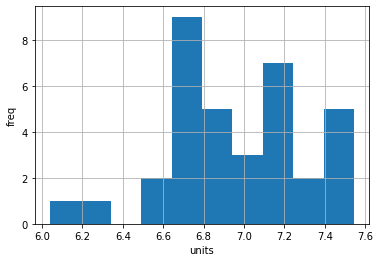

In [7]:
df['Unit B'].hist()
plt.xlabel("units")
plt.ylabel("freq")
plt.show()

In [10]:
from statsmodels.graphics.gofplots import qqplot

In [ ]:
qqplot(df['Unit B'])

In [ ]:
qqplot(df['Unit A'])

In [9]:
df.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [18]:
import scipy

In [19]:
from scipy.stats import shapiro#For Normality test

In [24]:
w,p=shapiro(df['Unit A'])

In [25]:
w,p

(0.9649458527565002, 0.3199819028377533)

In [26]:
alpha=0.05
if p>alpha:
    print("data is drawn from normal distribution")
else:
    print("data does not belongs to normal")

data is drawn from normal distribution


In [27]:
w,p=shapiro(df['Unit B'])

In [28]:
alpha=0.05
if p>alpha:
    print("data is drawn from normal distribution")
else:
    print("data does not belongs to normal")

data is drawn from normal distribution


In [23]:
from scipy.stats import levene

In [29]:
S,pv=levene(df['Unit A'],df['Unit B'])

In [30]:
pv

0.4176162212502553

In [31]:
from scipy.stats import ttest_ind

In [34]:
t,p=ttest_ind(df['Unit A'],df['Unit B'],equal_var=True)
t,p

(0.7228688704678061, 0.4722394724599501)

In [35]:
#p>0.05, Accept Null Hypothesis

In [42]:
lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


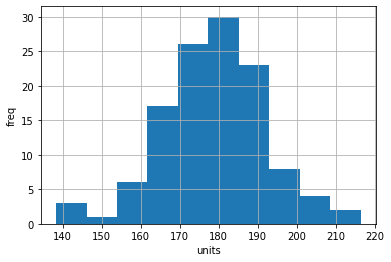

In [43]:
lab['Laboratory 1'].hist()
plt.xlabel("units")
plt.ylabel("freq")
plt.show()

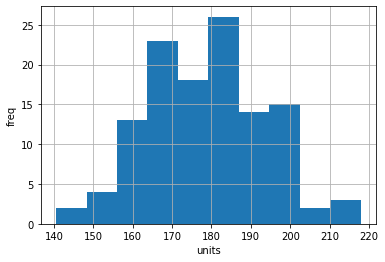

In [44]:
lab['Laboratory 2'].hist()
plt.xlabel("units")
plt.ylabel("freq")
plt.show()

In [50]:
w1,p1=shapiro(lab['Laboratory 1'])
w1,p1

(0.9901824593544006, 0.5506953597068787)

In [51]:
w2,p2=shapiro(lab['Laboratory 2'])
w2,p2

(0.9936322569847107, 0.8637524843215942)

In [52]:
w3,p3=shapiro(lab['Laboratory 3'])
w3,p3

(0.9886345267295837, 0.4205053448677063)

In [53]:
w4,p4=shapiro(lab['Laboratory 4'])
w4,p4

(0.9913753271102905, 0.6618951559066772)

In [54]:
#Data drawn from Normal Distribution

In [132]:
_,p=f_oneway(lab['Laboratory 1'],lab['Laboratory 2'])
p

0.7663277896545836

In [65]:
#pv>alpha i.e 0.05, Null hypothesis can be accepted

In [241]:
df=pd.read_csv('Faltoons.csv')

In [242]:
df.shape

(400, 2)

In [243]:
df.head()

,Weekdays,Weekend
0,Male,Female
1,Female,Male
2,Female,Male
3,Male,Female
4,Female,Female


In [244]:
df['Weekend'].value_counts()

Female    233
Male      167
Name: Weekend, dtype: int64

In [245]:
df['Weekdays'].value_counts()

Female    287
Male      113
Name: Weekdays, dtype: int64

In [246]:
from statsmodels.stats.proportion import proportions_ztest

In [282]:
tab = df.groupby(['Weekend','Weekdays']).size()

In [283]:
tab

Weekend  Weekdays
Female   Female      167
         Male         66
Male     Female      120
         Male         47
dtype: int64

In [284]:
count = np.array([233, 167])
nobs = np.array([400,167])

# help(proportions_ztest)

In [286]:
stat, pval = proportions_ztest(count, nobs,alternative='two-sided')

In [287]:
pval

2.749064836026465e-23

In [ ]:
pval<0.05; reject null hypothesis

# Buyer ratio

In [423]:
df=pd.read_csv('BuyerRatio.csv')

In [424]:
df.shape

(2, 5)

In [438]:
df

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [433]:
table=df.iloc[:,1:]

In [434]:
table

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [435]:
Chisquares_results=scipy.stats.chi2_contingency(table)

In [436]:
Chisquares_results

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [437]:
stat, p, dof, expected = chi2_contingency(table)

In [439]:
p

0.6603094907091882

In [440]:
#Accept null hypothesis

#Customer

In [370]:
df=pd.read_csv("Costomer+OrderForm.csv")

In [371]:
df.shape

(300, 4)

In [372]:
df.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [418]:
tab = df.groupby(['India','Indonesia']).size()

In [419]:
tab

India       Indonesia 
Defective   Defective       2
            Error Free     18
Error Free  Defective      31
            Error Free    249
dtype: int64

In [420]:
count = np.array([18, 249])
nobs = np.array([20,280])

In [421]:
stat, pval = proportions_ztest(count, nobs,alternative='two-sided')

In [422]:
pval

0.88238483752025

In [417]:
#Accept Null Hypothesis